# **Project Name**    - Cardiovascular risk prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Project Summary: Predicting Coronary Heart Disease Risk**

This project aims to develop a machine learning model to predict the risk of coronary heart disease (CHD) within the next 10 years for patients in Framingham, Massachusetts. The dataset includes records of over 4,000 patients, with 15 attributes covering demographic, behavioral, and medical risk factors.

The focus is on binary classification, with the target variable "TenYearCHD" indicating whether a patient is at risk (1) or not (0). Features include age, sex, education, smoking status, blood pressure, and cholesterol levels. Handling missing values and ensuring data consistency are critical during data preprocessing.

Feature engineering involves crafting new features or transforming existing ones to enhance model performance. Model selection includes exploring algorithms like logistic regression, decision trees, random forests, and support vector machines, evaluated on metrics like accuracy, precision, recall, and F1-score.

Hyperparameter tuning fine-tunes model performance using techniques like grid search or randomized search. Model evaluation involves assessing performance metrics and ensuring generalizability through cross-validation.

The success of the project is measured by the model's ability to accurately predict CHD risk, enabling healthcare professionals to identify high-risk individuals for timely interventions and personalized healthcare recommendations.

In conclusion, this project aims to leverage machine learning to predict CHD risk, contributing to preventive healthcare efforts and potentially reducing the burden of cardiovascular diseases.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
#importing necessary liabrary for handling missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

### Dataset Loading

In [ ]:
#mounting the google drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Almabetter Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df.sample(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
156    156   39        2.0   F        YES        20.0     0.0   
641    641   43        2.0   M        YES        20.0     0.0   
1157  1157   61        1.0   F        YES        20.0     0.0   
2173  2173   48        1.0   F         NO         0.0     0.0   
1306  1306   53        2.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
156                 0             0         0    190.0  137.0   81.0  19.57   
641                 0             0         0    275.0  111.0   76.0  23.95   
1157                0             0         0    229.0  122.0   83.0  25.45   
2173                0             1         0    202.0  171.0   97.0  32.67   
1306                0             1         0    230.0  170.0  113.0  29.55   

      heartRate  glucose  TenYearCHD  
156        80.0     85.0           1  
641        68.0     65.0           0  
1157       78.0     61.0           0  
2173       95.0     78.0           0  
1306      115.0    115.0           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)

Duplicate Value Count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
#installing missingno
!pip install missingno

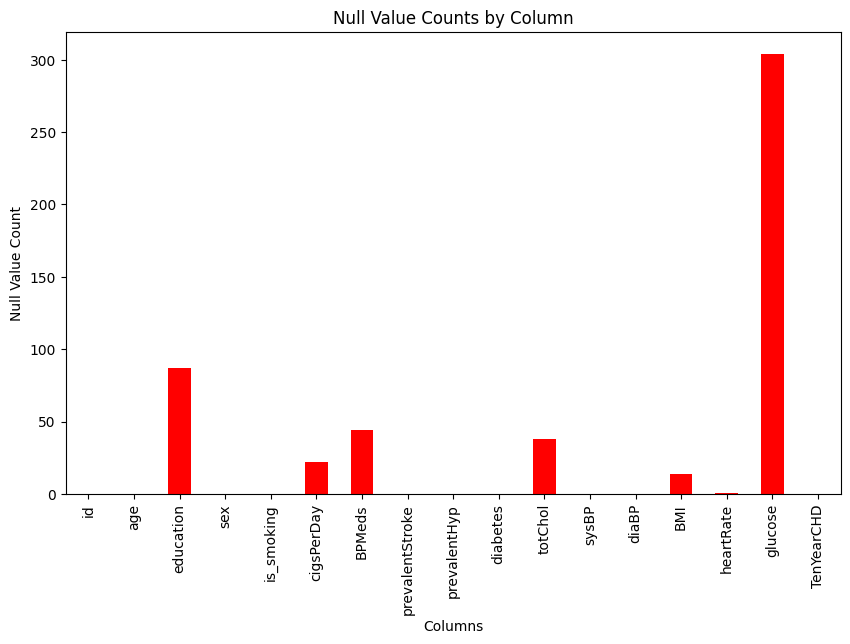

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

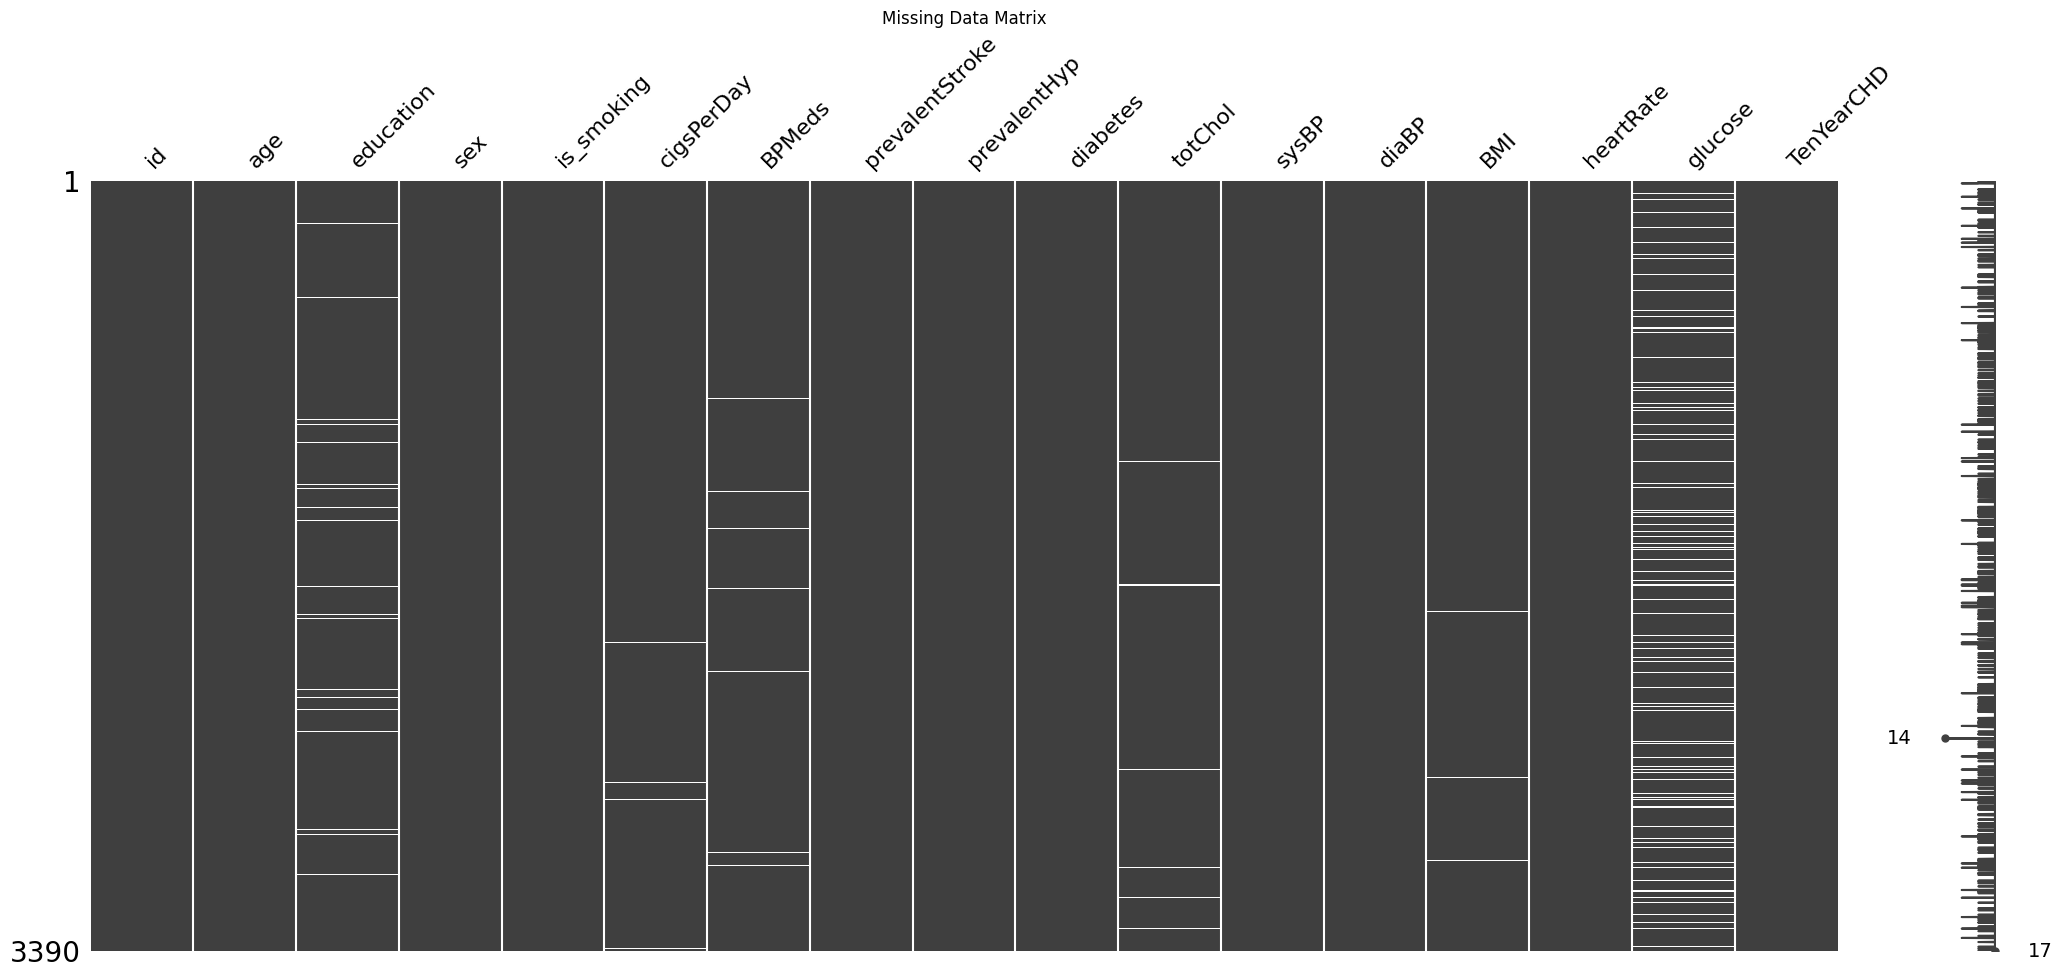

In [ ]:
# Visualizing the missing values
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [ ]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

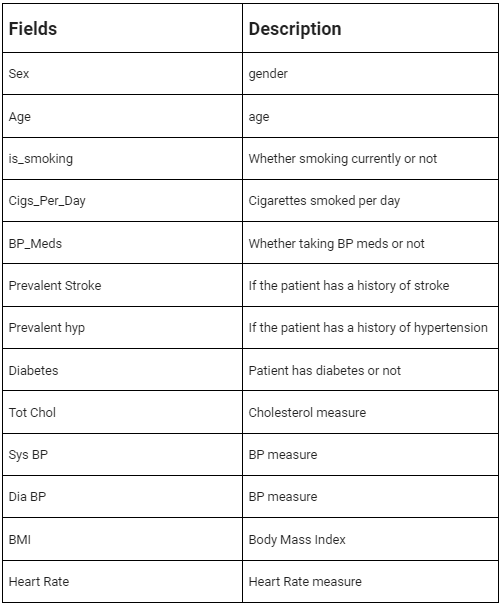

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Feature Manipulation

In [ ]:
# def blood_presure_classification(SysBP, DiaBP):
#   if (SysBP < 90) or (DiaBP < 60):
#     return 0 # 'Hypotension'
#   if (SysBP < 120) and (DiaBP < 80):
#     return 1 # 'Optimal'
#   if (SysBP < 130) or (DiaBP < 86):
#     return 2 # 'Normal'
#   if (SysBP < 140) or (DiaBP < 90):
#     return 3 # 'PreHypertensive'
#   if (SysBP > 140) and (DiaBP < 90):
#     return 4 # 'IsolatedSystolicHypertension'
#   if (SysBP < 160) or (DiaBP < 100):
#     return 5 # 'GradeI'
#   if (SysBP < 180) or (DiaBP < 110):
#     return 6 # 'GradeII'
#   return 7 # 'GradeIII'

In [ ]:
# #Creating new feature Hypertension
# df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [ ]:
#Creating new feature Diabetes
df['Diabetes_grade'] = df['glucose'].apply(lambda x: diabetes_grade(x))

In [ ]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["mean_art_pressure"] = (df["sysBP"] + 2 * df["diaBP"])/3

In [ ]:
# remove not useful columns
df.drop(columns=['id','sysBP', 'diaBP', 'glucose','diabetes'], inplace=True)

### What all manipulations have you done and insights you found?

Right now i just drop the ID column as it is not relevant in predicting the 'TenyearCHD'

created 3 lists containing the column names which will be helpful for further manipulation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Finding the best imputation value for the columns containing missing values

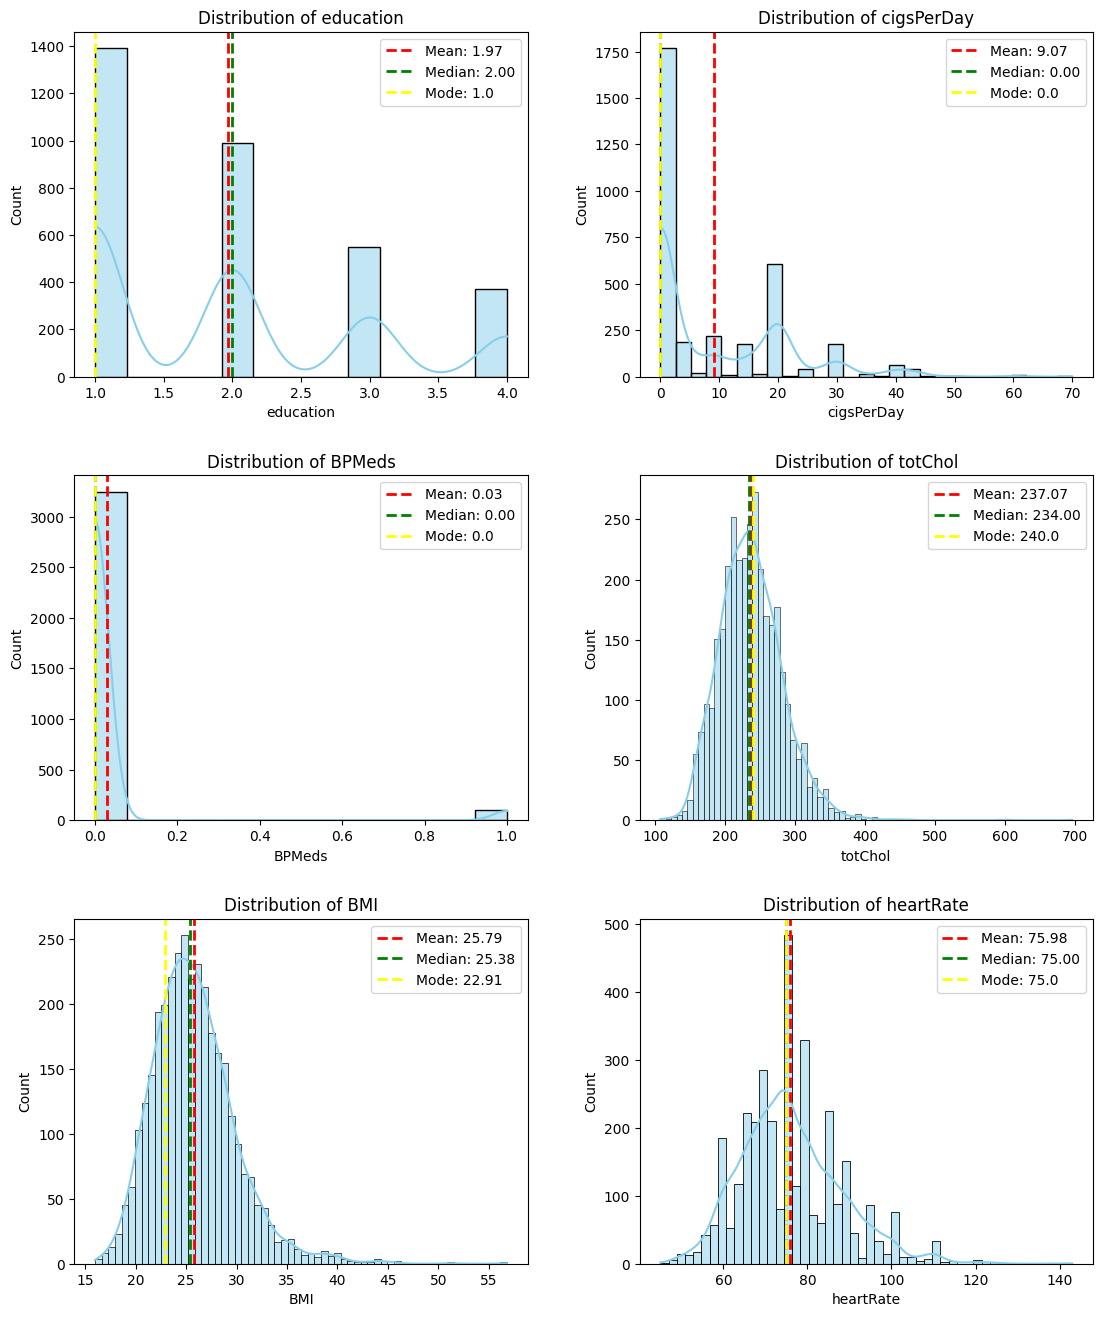

In [ ]:
# List of columns to plot
columns_to_plot = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI','heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

# Check if there are enough subplots for the columns to plot
if len(columns_to_plot) > len(axes.flatten()):
    raise ValueError("Not enough subplots for the number of columns to plot.")

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

##### 1. Why did you pick the specific chart?

Utilizing visualizations is the optimal method for presenting information; it allows for a clear identification of which values to fill in for missing data.

##### 2. What is/are the insight(s) found from the chart?

- Education level: Bimodal distribution suggests a mix of low and higher educated individuals.
- Cigarettes per day: Highly skewed distribution indicates both non-smokers and heavy smokers.
- Blood pressure medications: Skewed towards zero, most individuals are not taking any medications.
- Total cholesterol: Relatively normal distribution centered around 240 mg/dL.
- BMI: Approximately normal distribution indicates a generally healthy weight range.
- Heart rate: Slightly skewed distribution with a peak around 75 bpm, within the normal range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Tailoring products/services to different customer segments based on health characteristics.
- Identifying opportunities for preventive health initiatives or educational campaigns.
- Developing targeted health plans, insurance policies, or wellness programs.
- Optimizing resource allocation and service delivery based on prevalent health profiles.

#### Chart - 2 OUTLIER HANDLING -Examining the prescence of outlier in the dataset and handling it.

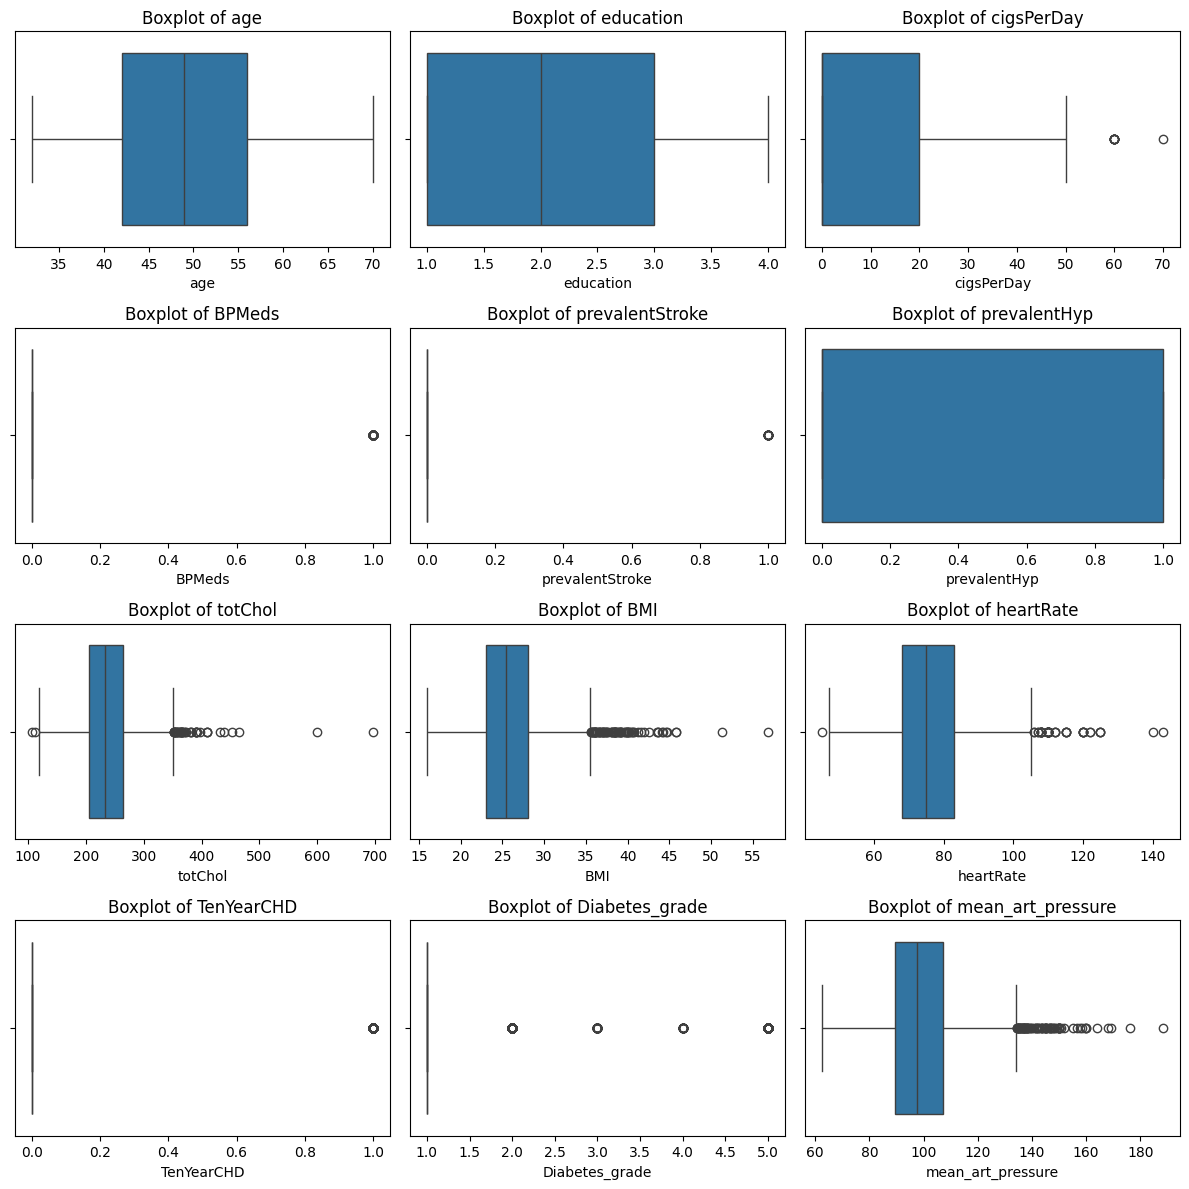

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a pandas DataFrame called 'df'

# Selecting only continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating number of rows and columns for subplots
num_plots = len(continuous_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*3))

# Flattening the axes array
axes = axes.flatten()

# Looping through continuous columns and creating boxplots
for i, column in enumerate(continuous_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Removing any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### handling the outlier

In [ ]:
# List of columns to exclude from outlier handling
exclude_columns = ['BPMeds', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

object_columns = ['sex','is_smoking']
# Selecting only continuous columns excluding the specified ones
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

# Handling outliers using IQR method
for column in continuous_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Concatenating the modified columns with the specified columns
df_concatenated = pd.concat([df[continuous_columns],df[object_columns],df[exclude_columns]], axis=1)

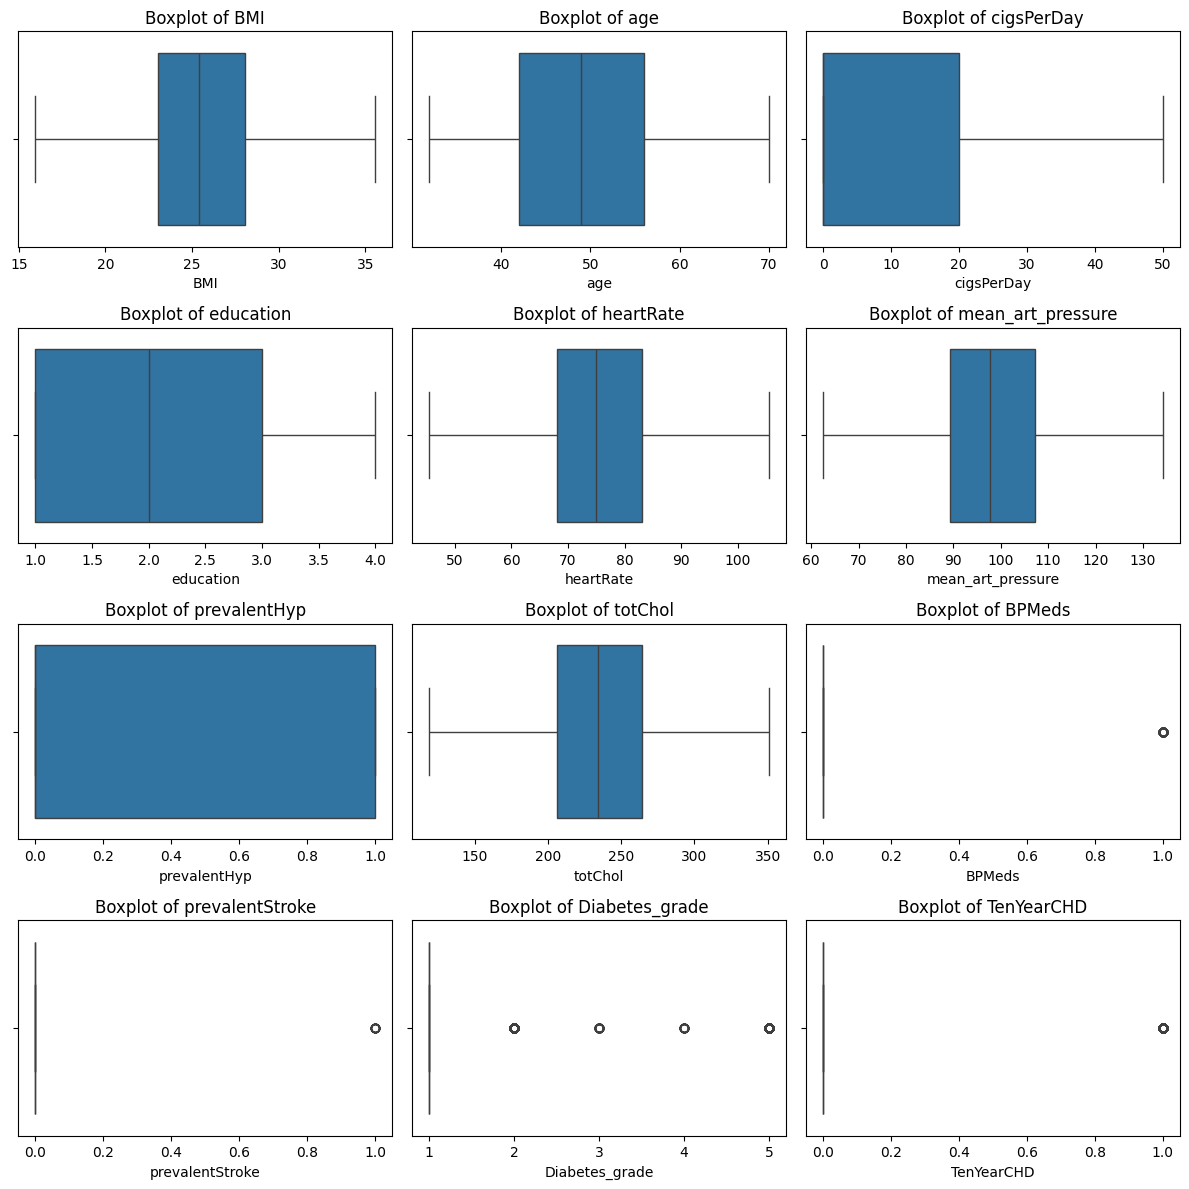

In [ ]:
# Selecting only continuous columns
continuous_columns = df_concatenated.select_dtypes(include=['float64', 'int64']).columns

# Calculating number of rows and columns for subplots
num_plots = len(continuous_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*3))

# Flattening the axes array
axes = axes.flatten()

# Looping through continuous columns and creating boxplots
for i, column in enumerate(continuous_columns):
    sns.boxplot(x=df_concatenated[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Removing any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Chosen for analysis as it likely represents the data more accurately post-outlier handling, ensuring reliable insights.

##### 2. What is/are the insight(s) found from the chart?


- BMI: Mostly within 20-30, indicating a healthy weight range.
- Age: Concentrated around 40-60 years, suggesting middle-aged to older adults.
- Cigarettes per day: Majority close to zero, indicating many non-smokers or light smokers.
- Education level: Bimodal, with peaks around 1.0 and 3.0 years, indicating varied educational backgrounds.
- Heart rate: Centered around 60-80 bpm, within normal range for adults.
- Total cholesterol: Concentrated around 200-300 mg/dL, with some higher values, indicating a mix of normal and elevated levels.
- Prevalence of hypertension: Mostly 0 or 1, indicating presence or absence of hypertension.
- Mean arterial pressure: Centered around 90-100 mmHg, normal for adults.
- Blood pressure medications and prevalence of stroke: Mostly 0, indicating low prevalence of stroke and limited medication usage.
- Ten-year risk of coronary heart disease and diabetes grade: Few non-zero values, suggesting low prevalence/severity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Tailoring healthcare services, insurance plans, or wellness programs.
- Identifying opportunities for preventive care initiatives or educational campaigns.
- Optimizing resource allocation and service delivery.
- Developing personalized treatment plans or lifestyle recommendations.
- Improving risk assessment and pricing models for insurance products.
- Enhancing customer satisfaction and health outcomes.

Responsibly handling and interpreting these insights is crucial to avoid discrimination or unfair practices.

#### Chart - 3 "Comparison of BMI Distribution between Patients with and without CHD"

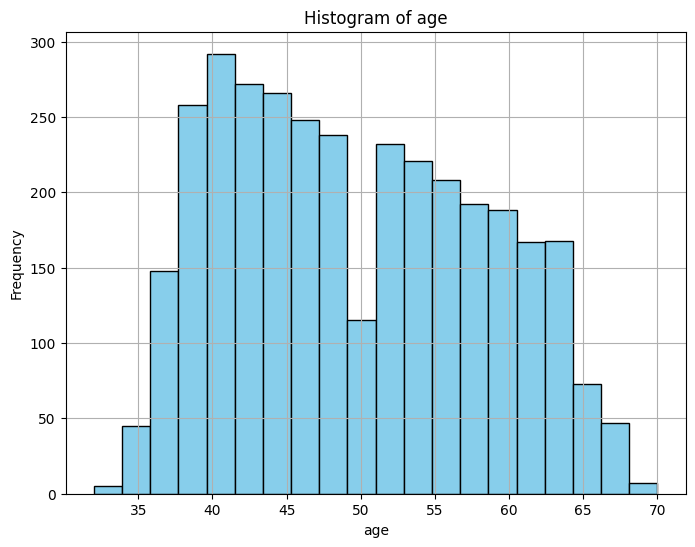

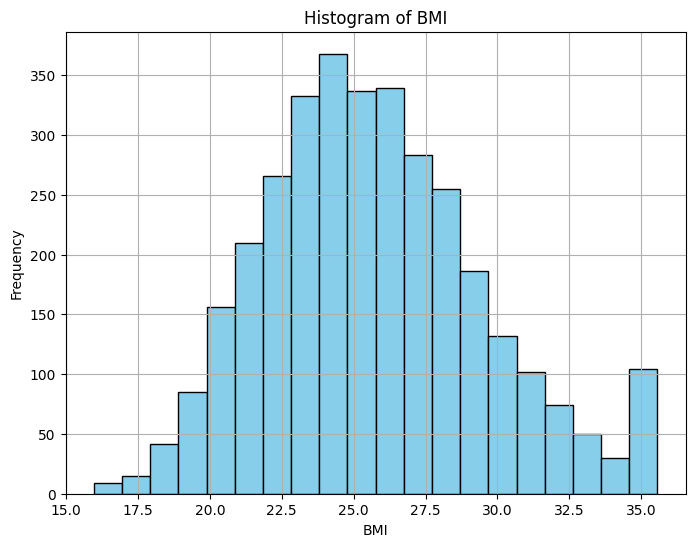

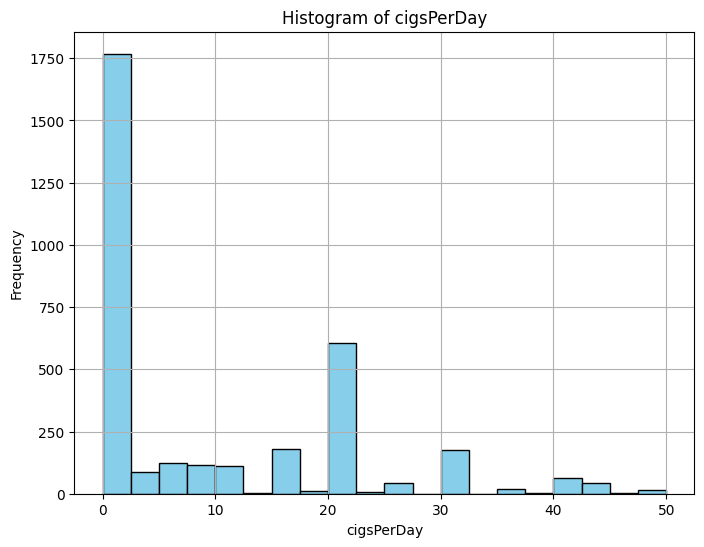

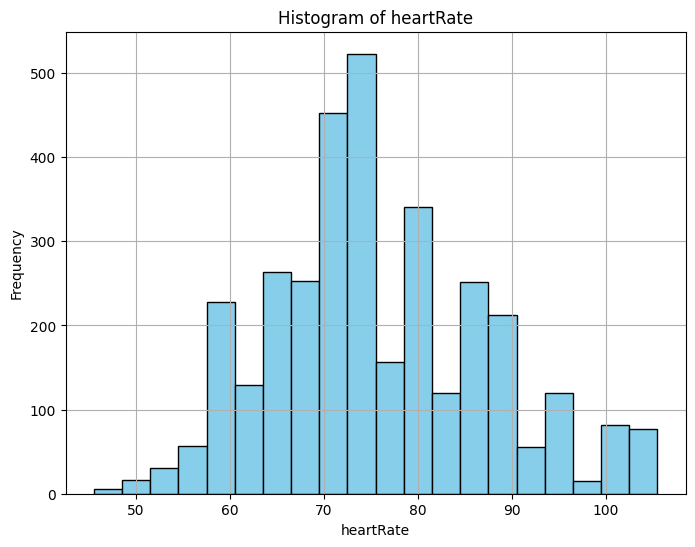

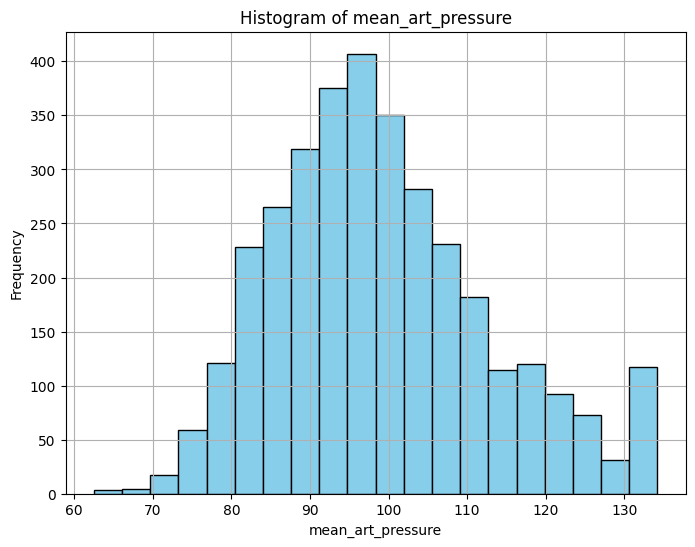

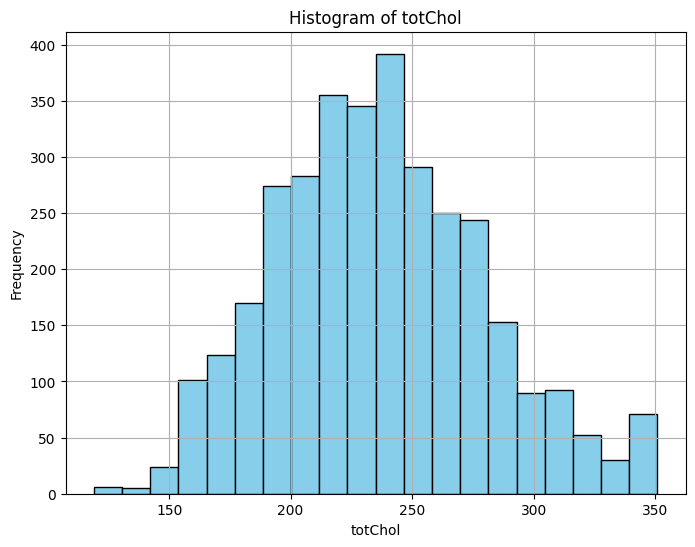

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of numerical variables
numerical_vars = ['age', 'BMI', 'cigsPerDay', 'heartRate', 'mean_art_pressure', 'totChol']

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_concatenated[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.The histogram was chosen because it effectively visualizes the distribution of BMI (Body Mass Index) for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing BMI between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

Not a big difference in BMI distribution, there is few outlier in BMI OF CHD person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on the BMI distribution may not significantly impact business positively, but identifying outliers in BMI among CHD patients can inform targeted interventions, potentially reducing adverse health outcomes and healthcare costs.

#### Chart - 4 "Comparison of Heart Rate between Patients with and without CHD"

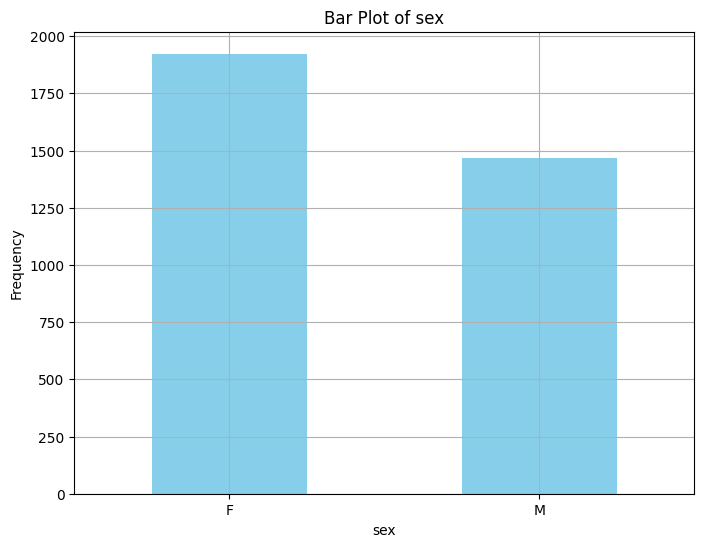

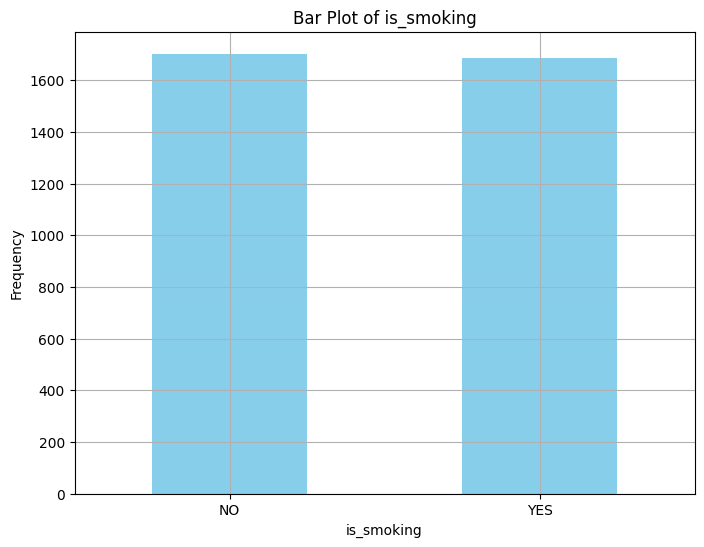

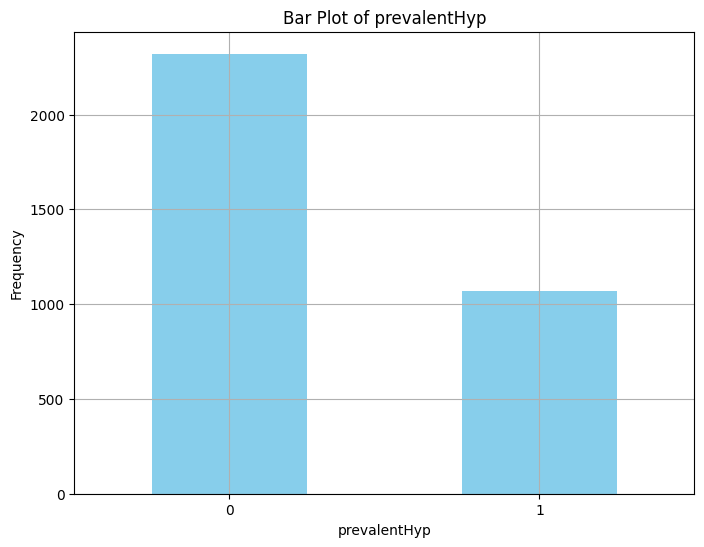

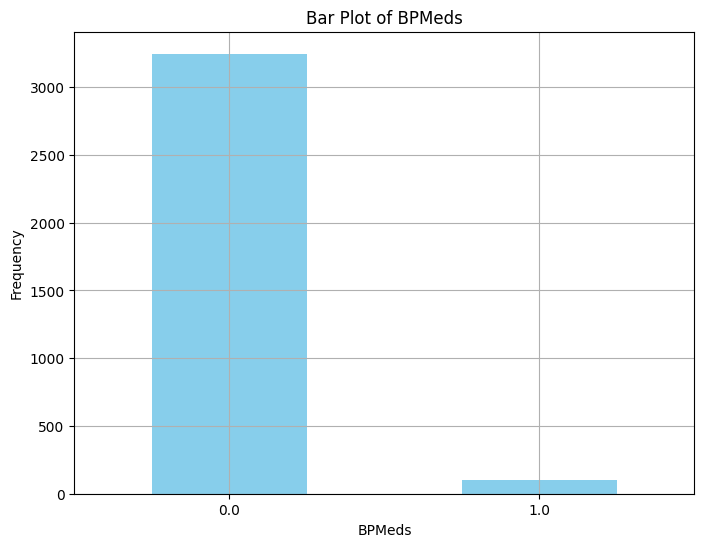

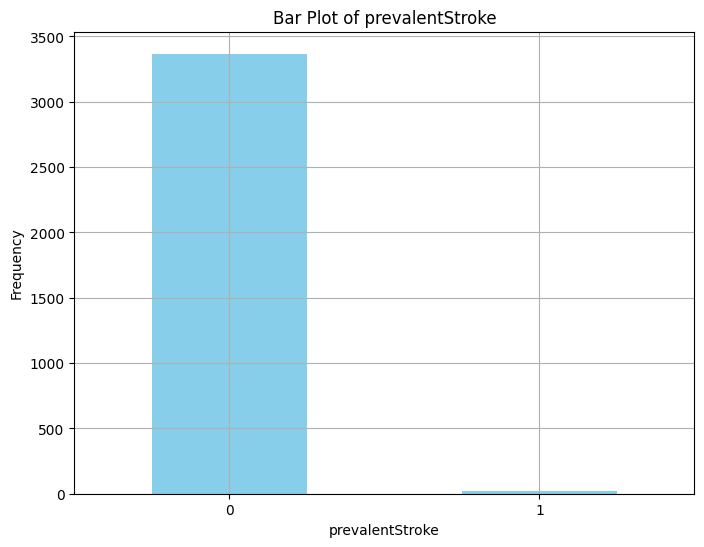

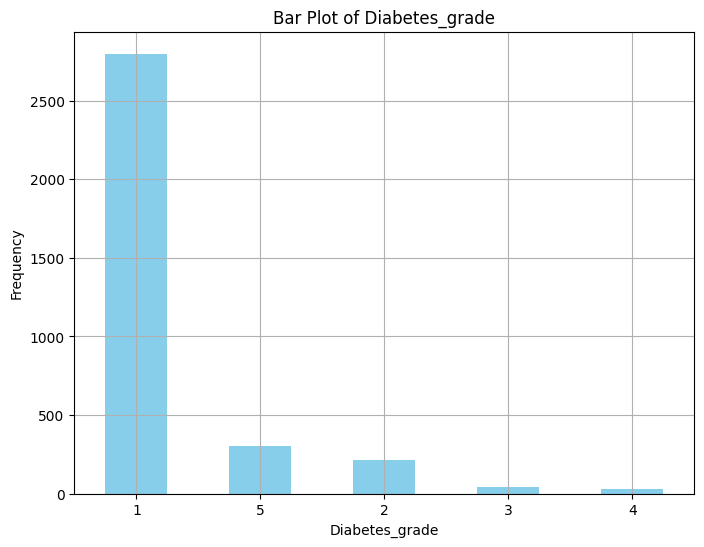

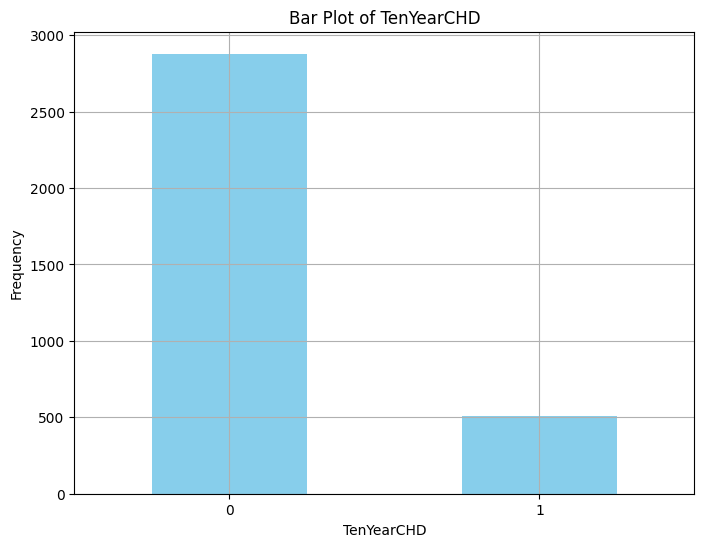

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical variables
categorical_vars = ['sex', 'is_smoking', 'prevalentHyp', 'BPMeds', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

# Plot bar plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df_concatenated[var].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.grid(True)
    plt.show()


##### 1. Why did you pick the specific chart?

The box plot was selected because it effectively compares the distribution of heart rates between patients with and without CHD. Its ability to show the central tendency, spread, and any potential outliers in the data makes it suitable for comparing continuous variables across different groups.

##### 2. What is/are the insight(s) found from the chart?

No big difference in Heart rate of patient with or without CHD , but If your heart rate is over 100 beats per minute when you are at rest, this is considered fast. A rapid heart rate, also known as tachycardia, can be related to many different health conditions. It's normal for your heart rate to increase when you're exercising or if your body is fighting off an infection.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on heart rate differences between CHD and non-CHD patients may not directly impact business positively. However, identifying elevated heart rates (>100 bpm) among individuals can prompt targeted healthcare interventions, potentially mitigating health risks and reducing healthcare costs. Failure to address elevated heart rates may lead to negative health outcomes, impacting business productivity and healthcare expenses.

#### Chart - 5 Comparison of Glucose Distribution between Patients with and without CHD

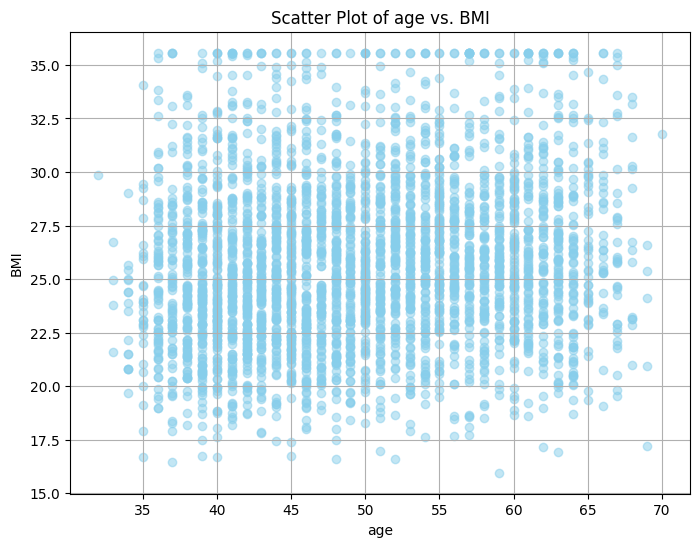

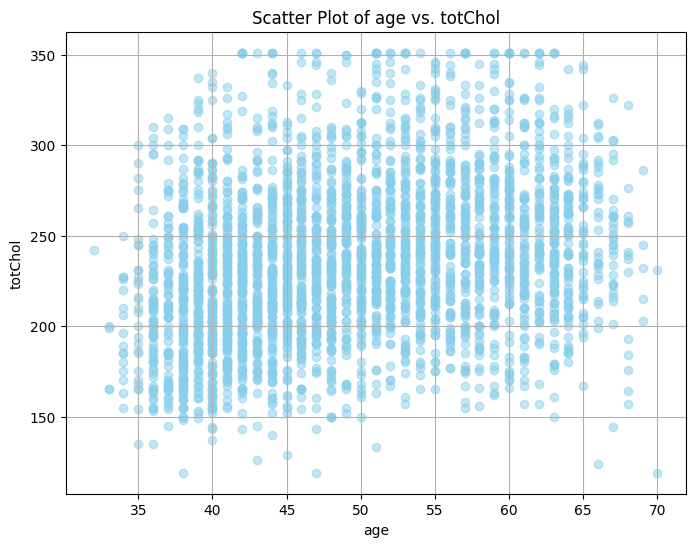

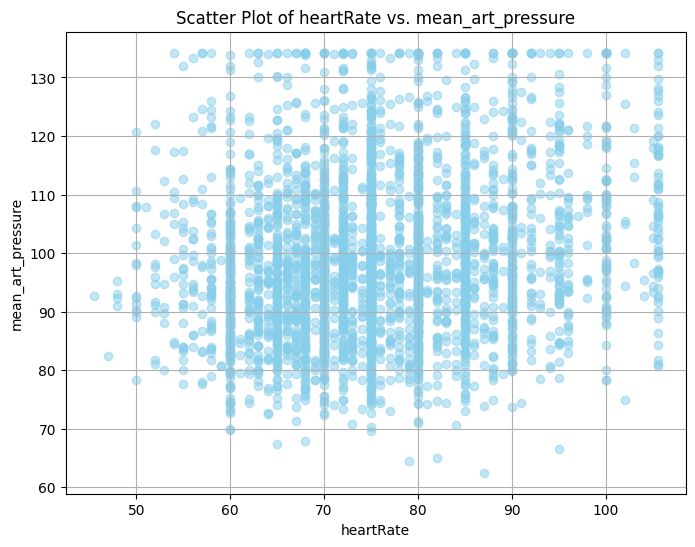

In [ ]:
# List of numerical variable pairs for scatter plots
numerical_pairs = [('age', 'BMI'), ('age', 'totChol'), ('heartRate', 'mean_art_pressure')]

# Plot scatter plots for each numerical variable pair
for pair in numerical_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_concatenated[pair[0]], df_concatenated[pair[1]], color='skyblue', alpha=0.5)
    plt.title(f'Scatter Plot of {pair[0]} vs. {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen because it effectively displays the distribution of glucose levels for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing glucose levels between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

No significant change is visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer HereInsights into glucose level distributions may aid in creating positive business impact by informing preventive healthcare measures and personalized interventions, potentially reducing the risk of CHD and associated healthcare costs. However, if significant disparities or abnormalities in glucose levels exist, they could indicate underlying health issues, leading to negative growth due to increased healthcare expenses and decreased productivity.

#### Chart - 6 - "Prevalence of Hypertension Across Age Groups"

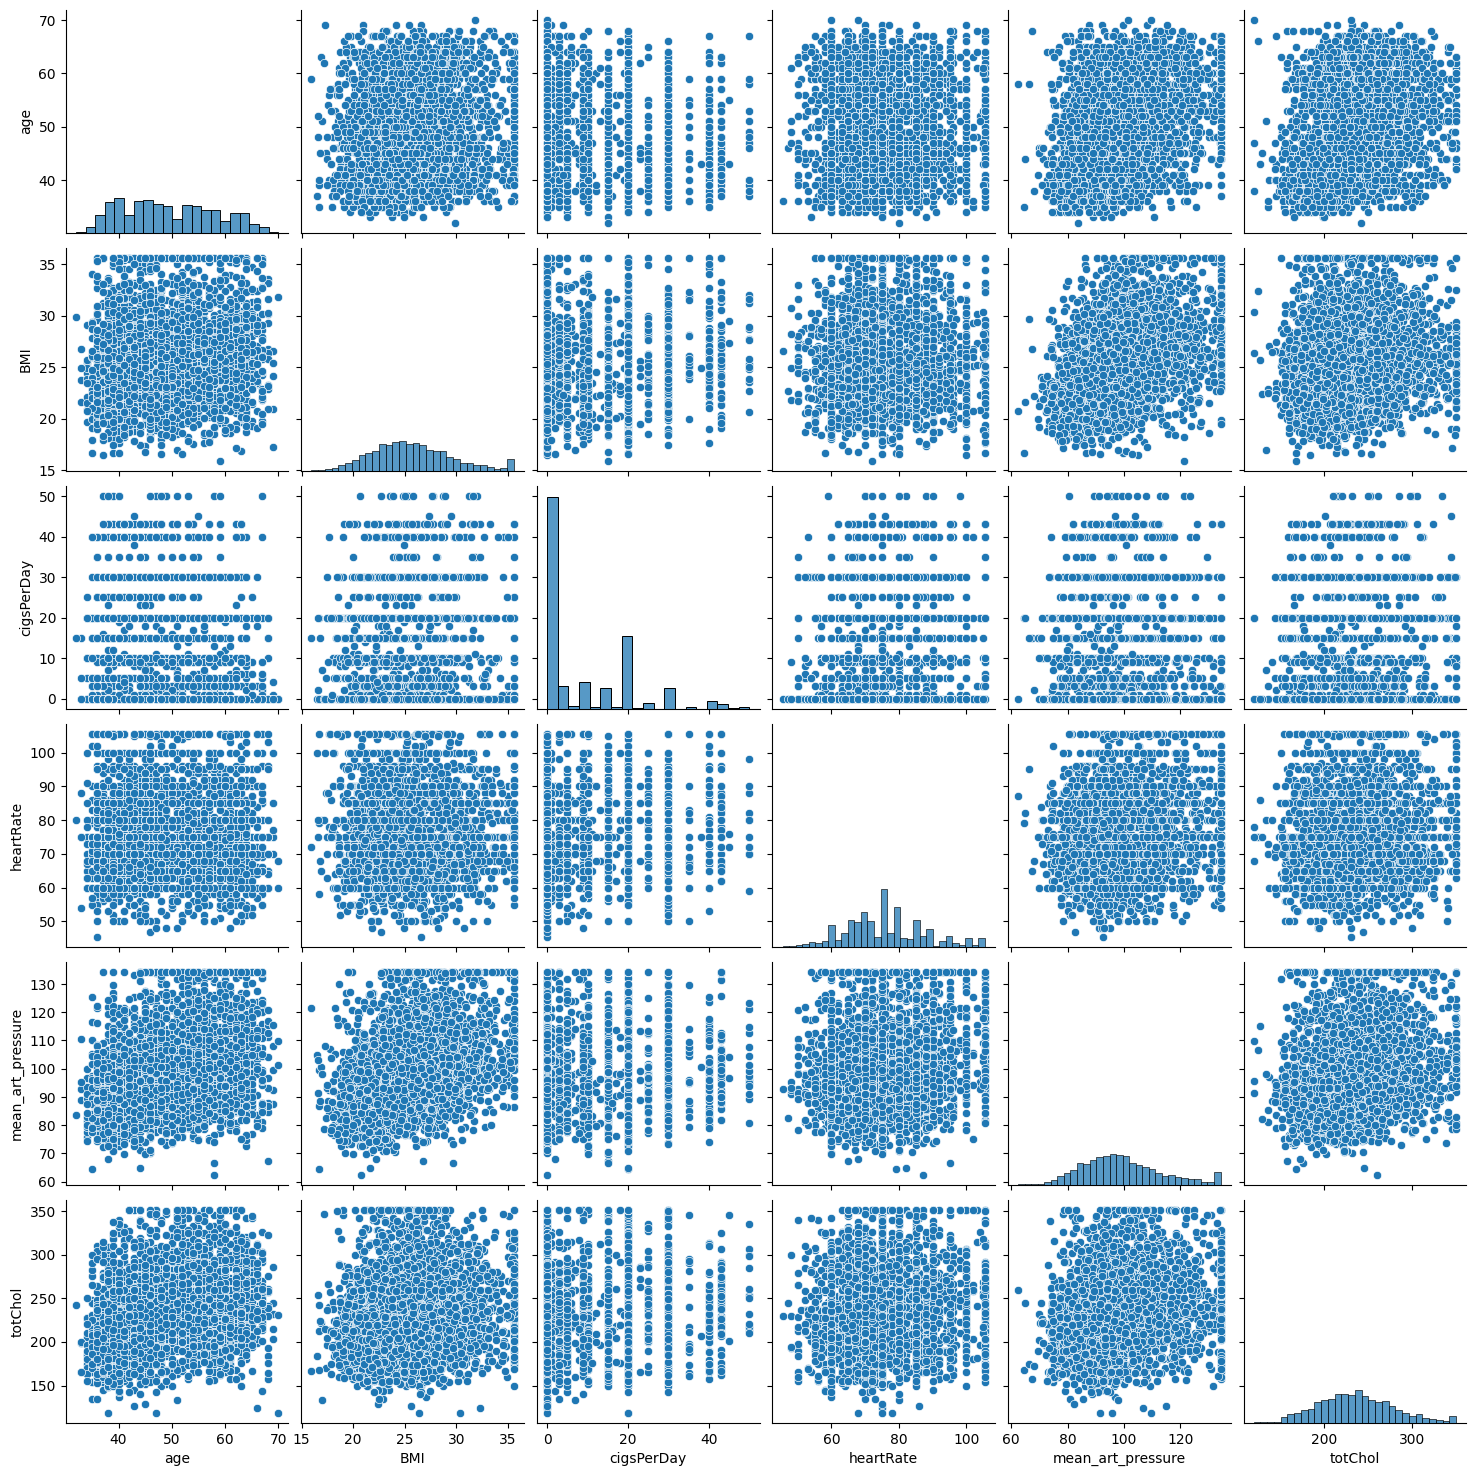

In [ ]:
# List of numerical variables
numerical_vars = ['age', 'BMI', 'cigsPerDay', 'heartRate', 'mean_art_pressure', 'totChol']

# Create pair plot
sns.pairplot(df_concatenated[numerical_vars])
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it effectively displays the prevalence of hypertension across different age groups, making it easy to observe trends and variations in hypertension counts among patients with and without CHD. Its simplicity and ability to show categorical data with hue differentiation make it suitable for comparing hypertension prevalence across age groups.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart indicate that the prevalence of hypertension varies across different age groups, with notable differences between patients with and without CHD. For patients without CHD, hypertension counts peak around age 40 and then decline, while for those with CHD, hypertension counts continue to rise until around age 63 before declining. This suggests potential age-related trends in hypertension prevalence among patients with and without CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights on hypertension prevalence across age groups can positively impact businesses by informing targeted healthcare interventions and preventive measures, potentially reducing the incidence of cardiovascular diseases like CHD and associated healthcare costs. However, if hypertension prevalence remains high or increases with age, it may lead to negative growth due to elevated healthcare expenses and decreased workforce productivity associated with managing hypertension-related complications.

#### Chart - 7 -- Prevalence of Diabetes for Different Age Groups

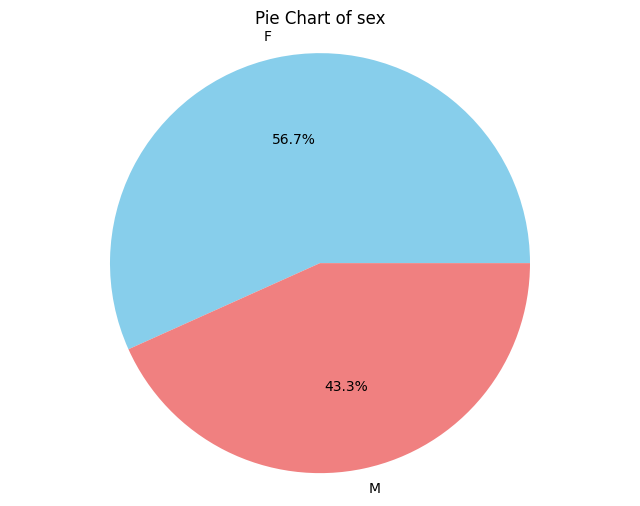

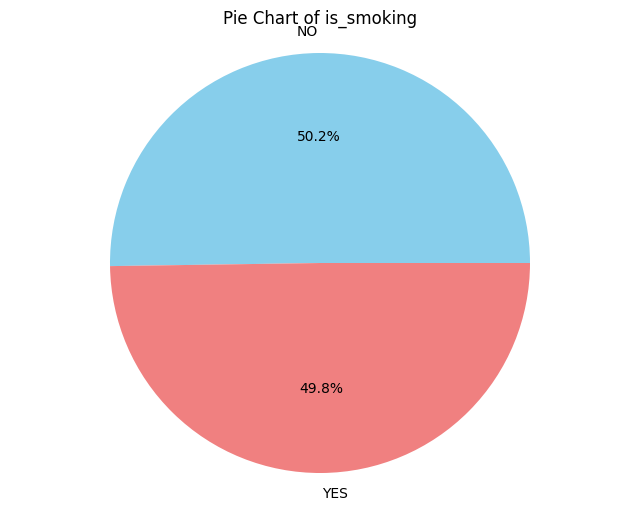

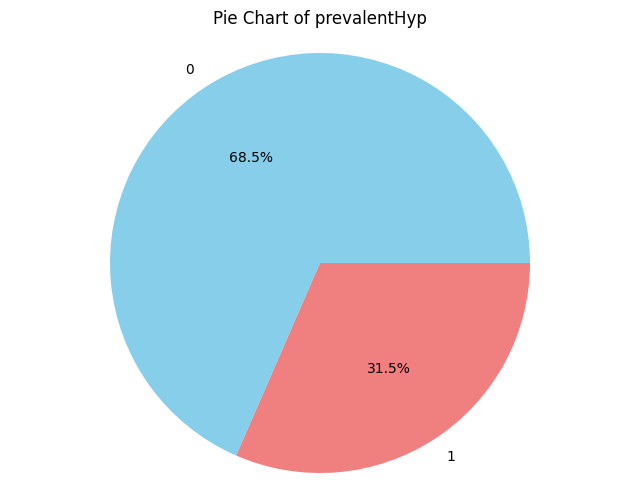

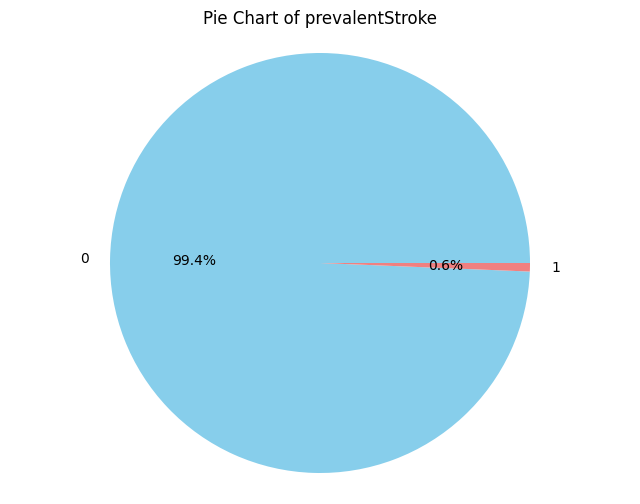

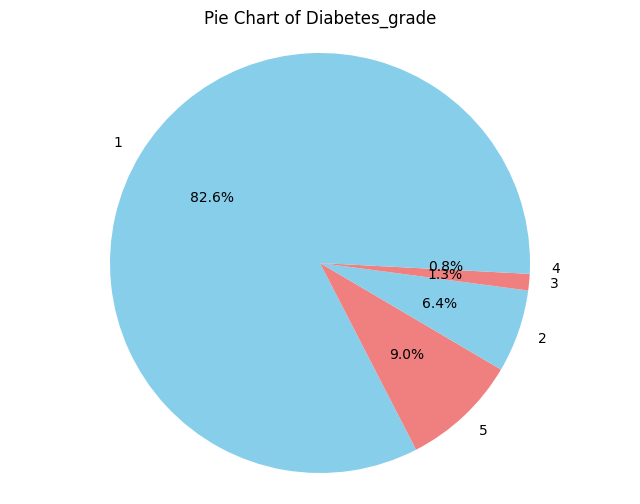

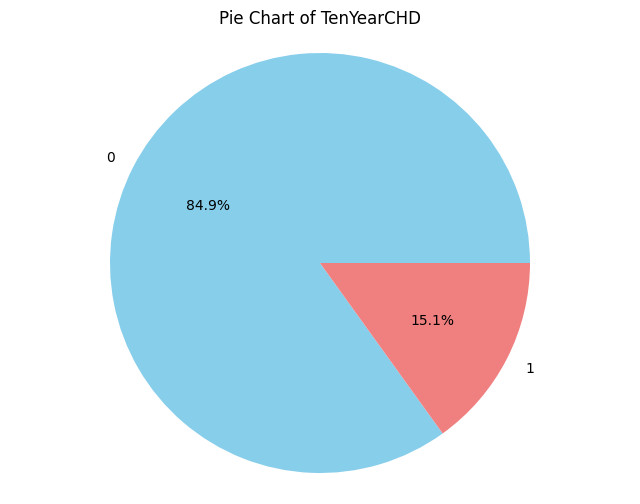

In [ ]:
# List of categorical variables
categorical_vars = ['sex', 'is_smoking', 'prevalentHyp', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

# Plot pie charts for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df_concatenated[var].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title(f'Pie Chart of {var}')
    plt.ylabel('')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because it effectively displays the prevalence of diabetes across different age groups using categorical data.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it appears that there may be a higher prevalence of diabetes among individuals without coronary heart disease (CHD) compared to those with CHD, as indicated by the taller towers in the "No CHD" category compared to the "CHD" category. This insight suggests a potential correlation between diabetes and the absence of coronary heart disease, which could be further explored for implications in preventive healthcare and treatment strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights regarding the higher prevalence of diabetes among individuals without coronary heart disease could potentially lead to positive business impacts in healthcare, informing targeted prevention and management strategies. However, misinterpretation or inadequate contextualization of the insights could lead to negative growth implications, such as misguided treatment approaches or misallocation of resources.

#### Chart - 8

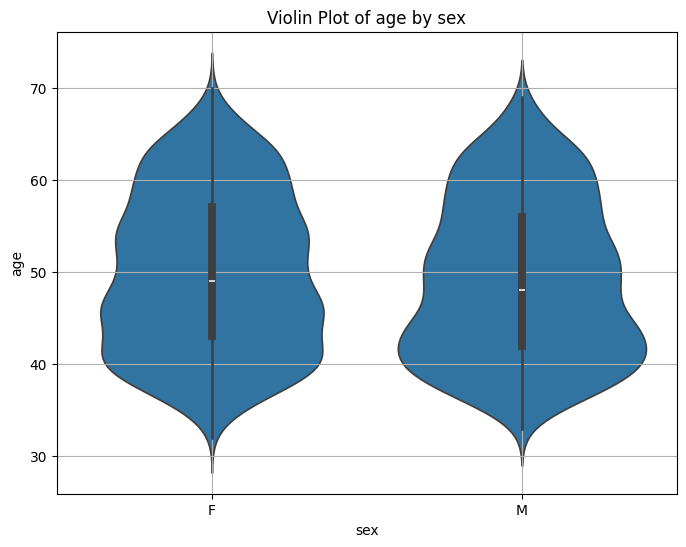

In [ ]:
categorical_var = 'sex'
numerical_var = 'age'

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=categorical_var, y=numerical_var, data=df_concatenated)
plt.title(f'Violin Plot of {numerical_var} by {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(numerical_var)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of education levels because it effectively displays the frequency of each category within a single categorical variable. This allows for easy comparison of the education levels present in the dataset, providing insight into the educational demographics of the population.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart suggests that there are higher numbers of individuals with education level 1.0 compared to those with education levels 2.0, 3.0, and 4.0. This indicates that the majority of the population in the dataset likely has education level 1.0, followed by decreasing numbers for higher education levels. This insight can be useful for understanding the educational distribution within the dataset and potentially identifying any patterns or disparities in educational attainment among the population.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that education level 1.0 has higher numbers than 2.0, 3.0, and 4.0 could potentially lead to positive business impacts by informing targeted marketing or educational campaigns tailored to individuals with varying education levels. However, if the distribution of education levels is skewed due to biases in the dataset or if it does not accurately represent the target market, it could lead to negative growth implications by misguiding business decisions or resource allocations. Therefore, it's important to validate the insights and consider other relevant factors before implementing any strategies based on them.

#### Chart - 9 - Relationship between TenYearCHD and continous variable

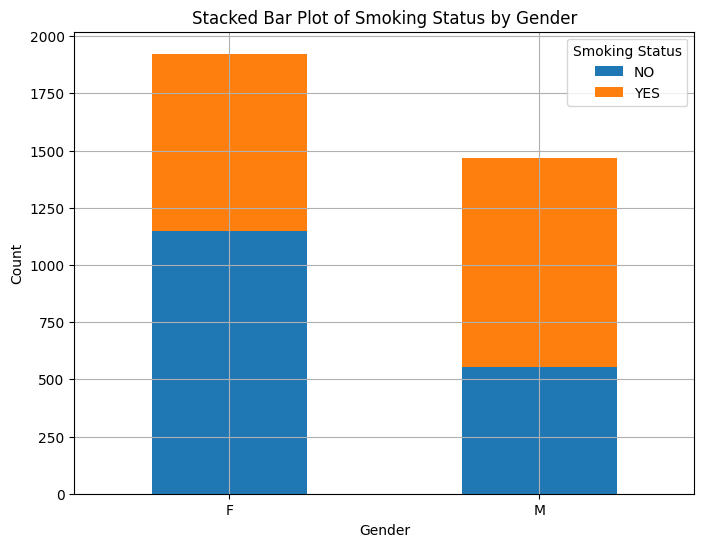

In [ ]:
# Create a cross-tabulation of 'sex' and 'is_smoking'
cross_tab = pd.crosstab(df_concatenated['sex'], df_concatenated['is_smoking'])

# Plot stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoking Status')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a violin plot to visualize the relationship between the dependent variable (TenYearCHD) and continuous independent variables because it effectively displays the distribution of the continuous variable across different categories of the dependent variable. The split violin plot also allows for easy comparison between categories, while the addition of hue (sex) provides further insights into potential gender differences within the data. Overall, the violin plot offers a comprehensive view of the relationship between TenYearCHD and each continuous independent variable, aiding in understanding the data's patterns and distributions.

##### 2. What is/are the insight(s) found from the chart?

Vatious distrubution pattern has been seen for men an women having chd and also do not have chd , some amazing pattern are visible here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin plots could potentially lead to positive business impacts by providing valuable information about the relationship between the risk of coronary heart disease (TenYearCHD) and various continuous independent variables, such as age, cholesterol levels, or blood pressure. These insights can inform the development of targeted prevention and intervention strategies, potentially leading to improved healthcare outcomes and reduced risks for individuals at higher risk of CHD.

However, if the insights reveal concerning patterns, such as a strong association between certain continuous variables and a higher risk of CHD, it could lead to negative growth implications. For instance, if the plots show that individuals with elevated cholesterol levels or blood pressure have a significantly higher risk of CHD, it could indicate a need for more intensive interventions or treatments for these individuals. Failure to address these risks adequately could lead to negative health outcomes and increased healthcare costs in the long run. Therefore, it's crucial to carefully analyze the insights and implement appropriate measures to mitigate any negative impacts.

#### Chart - 10 - Distribution Plot

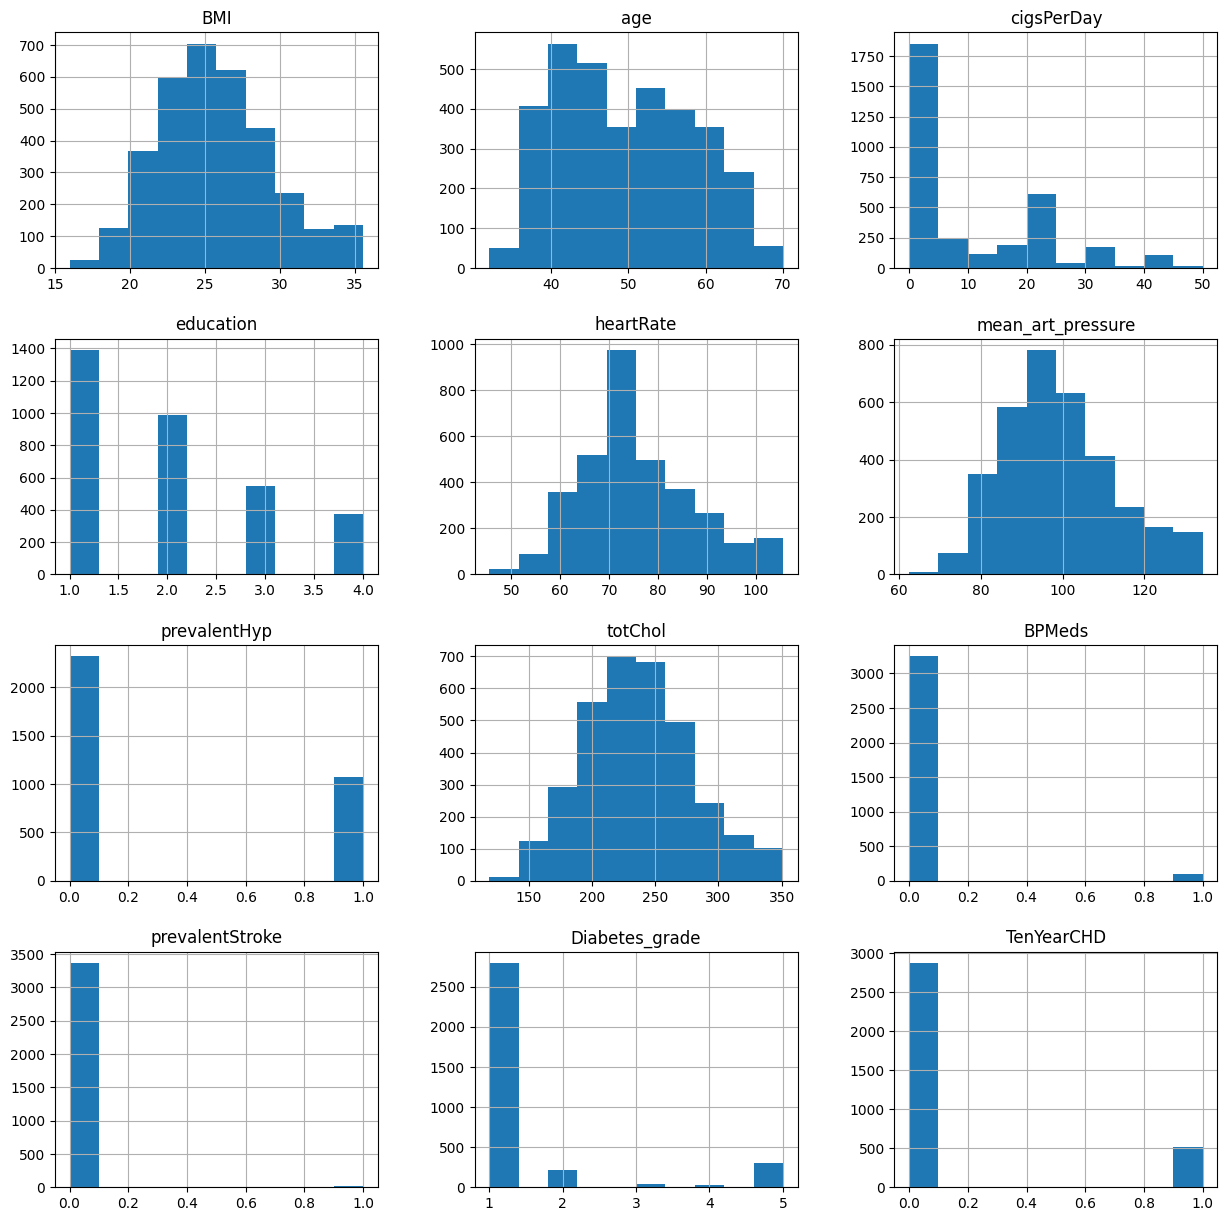

In [ ]:
# Visualizing distributions using Histograms:
df_concatenated.hist(figsize=(15, 15), grid=True);

##### 1. Why did you pick the specific chart?

I chose histograms for visualizing distributions because they provide a clear representation of the frequency distribution of numerical variables in the dataset. By plotting histograms for each numerical variable, we can quickly assess the shape, spread, and central tendency of the data, as well as identify any potential outliers or patterns within each variable. The use of histograms allows for a comprehensive exploration of the dataset's numerical characteristics in a single visualization, aiding in data exploration and understanding.

##### 2. What is/are the insight(s) found from the chart?

The insight from the histograms reveals that many of the numerical variables in the dataset exhibit skewness, indicating that their distributions are not symmetrical. Additionally, the presence of data imbalances suggests that certain values or ranges are more prevalent than others within these variables. These observations are important for understanding the characteristics of the dataset and may warrant further investigation into the underlying reasons for the skewness and imbalances, as well as consideration of appropriate data preprocessing techniques before conducting further analysis or modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying skewness and data imbalance in the dataset can potentially lead to positive business impacts by informing data preprocessing strategies to improve the accuracy and reliability of analytical models. However, if not properly addressed, these insights could lead to negative growth by compromising the effectiveness of predictive models, resulting in biased or inaccurate predictions that may adversely affect business decisions or outcomes. Therefore, addressing skewness and data imbalance through appropriate preprocessing techniques is crucial to ensure the reliability and effectiveness of subsequent analyses and business decisions.

#### Chart - 11 - Correlation Heatmap

Non-numeric columns: Index(['sex', 'is_smoking'], dtype='object')


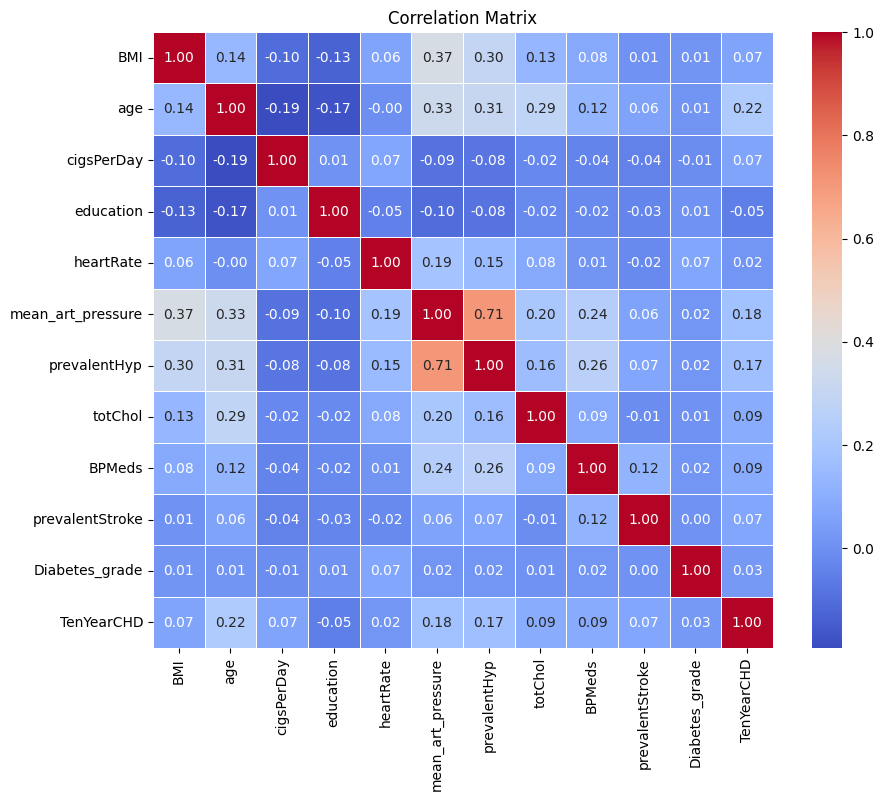

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df_concatenated.select_dtypes(exclude=['float', 'int']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Handle non-numeric data
# For example, you can drop non-numeric columns
df_numeric = df_concatenated.drop(columns=non_numeric_columns)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap of the correlation matrix because it effectively visualizes the relationships between numeric variables in the dataset. This allows for easy identification of patterns and strengths of correlations between different features, providing valuable insights into potential multicollinearity or dependencies among variables. The heatmap with annotated correlation values enhances readability and facilitates quick interpretation of the relationships within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight from the correlation matrix heatmap indicates that there is significant correlation between the variables sysbp, diabp, and prevalenthyp. Specifically, sysbp and diabp exhibit a high correlation with each other, suggesting a strong linear relationship between systolic and diastolic blood pressure measurements. Additionally, both sysbp and diabp show a high correlation with the variable prevalenthyp, indicating a potential association between hypertension prevalence and blood pressure levels. This insight highlights the interrelatedness of these variables within the dataset, which could be important for understanding cardiovascular health and informing healthcare interventions or risk assessment strategies.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean age between individuals who smoke and those who do not smoke.

Alternative Hypothesis (H1): There is a significant difference in the mean age between individuals who smoke and those who do not smoke.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Separate the dataset into two groups based on smoking status
smoking_group = df_concatenated[df_concatenated['is_smoking'] == 'YES']['age']
non_smoking_group = df_concatenated[df_concatenated['is_smoking'] == 'NO']['age']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(smoking_group, non_smoking_group, equal_var=False)

# Print the results
print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age between smokers and non-smokers.")


Independent Samples t-test Results:
t-statistic: -12.569448852196492
p-value: 1.9188328769657844e-35
Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test (ttest_ind) from the scipy.stats module to obtain the p-value. The t-test was applied to compare the mean age levels between two groups: smokers and non-smokers.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because we were comparing the means of two independent groups (smokers and non-smokers) with continuous data (age) to determine if there was a significant difference in mean age between the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the prevalence of hypertension between males and females.

Alternative Hypothesis (H1): There is a significant difference in the prevalence of hypertension between males and females.

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm

# Count the number of individuals with hypertension (1) and without hypertension (0) for males and females
hypertension_counts = df_concatenated.groupby('sex')['prevalentHyp'].value_counts().unstack().fillna(0)

# Perform two-sample proportion z-test
z_statistic, p_value = sm.stats.proportions_ztest(hypertension_counts[1], hypertension_counts.sum(axis=1))

# Print the results
print("Two-Sample Proportion Z-test Results:")
print("z-statistic:", z_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the prevalence of hypertension between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.")


Two-Sample Proportion Z-test Results:
z-statistic: -0.1788541357219063
p-value: 0.8580522363879984
Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-sample proportion z-test.

##### Why did you choose the specific statistical test?

The two-sample proportion z-test was chosen because we were comparing the proportions of a categorical variable (prevalence of hypertension) between two independent groups (males and females).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Define the imputation transformer
missing_value = ColumnTransformer([('impute_education', SimpleImputer(strategy='median'),['education']),
                                                ('impute_cigsPerDay', SimpleImputer(strategy='mean'),['cigsPerDay']),
                                                 ('impute_BPMeds', SimpleImputer(strategy='median'),['BPMeds']),
                                                ('impute_totChol', SimpleImputer(strategy='mean'),['totChol']),
                                                 ('impute_BMI', SimpleImputer(strategy='mean'),['BMI']),
                                                  ('impute_heartrate', SimpleImputer(strategy='mean'),['heartRate'])
                                                  ],
                                  remainder='passthrough')

### 2. Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
#Define the enoding transformer
encoding = ColumnTransformer(
 [('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [9,10])]
 ,remainder='passthrough')

### 3. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method is a common technique used to handle outliers. Here's a brief explanation of the IQR method and other outlier treatment techniques, along with reasons for their use:

Interquartile Range (IQR) Method:

Explanation: The IQR method involves calculating the interquartile range (the range between the 25th and 75th percentiles) of the data. Outliers are then identified as values that fall below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR.
Reason for use: The IQR method is robust and less sensitive to extreme values compared to other methods. It provides a simple and effective way to identify and handle outliers in the data.


### 4. Feature Selection

In [ ]:
# Define the feature selection transformer
feature_selection = SelectKBest(score_func=f_classif, k=4)

### 5. Data Scaling

In [ ]:
# Define the feature scaling transformer
scaler = StandardScaler()

### 6. Data Transformation using Pipeline

In [ ]:
pipe = Pipeline([
    ('missing_value',missing_value),
    ('encoding',encoding),
    ('feature_selection',SelectKBest(score_func=f_classif, k=5)),
    ('scaler',StandardScaler())])

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_concatenated.drop("TenYearCHD", axis=1)
y = df_concatenated['TenYearCHD']

#splitting the data into 85/15 ration
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=6)

In [ ]:
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_test_transformed = pipe.transform(X_test)

##### What data splitting ratio have you used and why?

###8 handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
X_train_resampled.shape

(4900, 5)

In [ ]:
y_train_resampled.shape

(4900,)

# ***7. ML Model Implementation***

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_predict_evaluate_model(model, X_train_resampled, y_train_resampled, X_test_transformed, y_test):
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test_transformed)

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Compute probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5.5, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Plot confusion matrix
    plt.figure(figsize=(5.25, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

def train_predict_evaluate_model_cv(model, param_grid, X_train_resampled, y_train_resampled, X_test_transformed, y_test):
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Print the best hyperparameters found
    print("Best hyperparameters:", grid_search.best_params_)

    # Train the model with the best hyperparameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_transformed)

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Compute probabilities for ROC curve
    y_pred_proba = best_model.predict_proba(X_test_transformed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5.5, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Plot confusion matrix
    plt.figure(figsize=(5.25, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       429
           1       0.23      0.57      0.33        80

    accuracy                           0.62       509
   macro avg       0.56      0.60      0.53       509
weighted avg       0.78      0.62      0.67       509

************************************************************
************************************************************
************************************************************


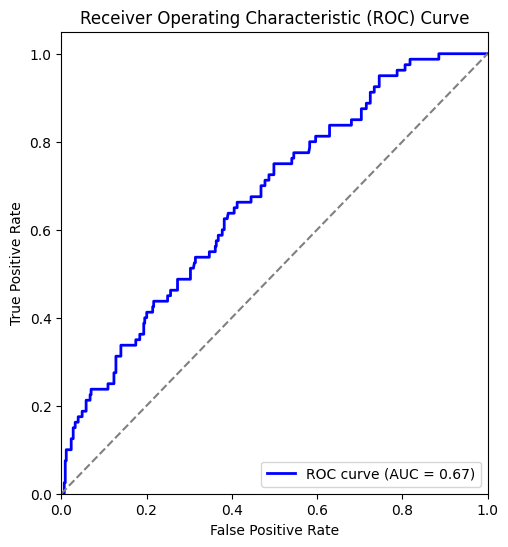

************************************************************
************************************************************
************************************************************


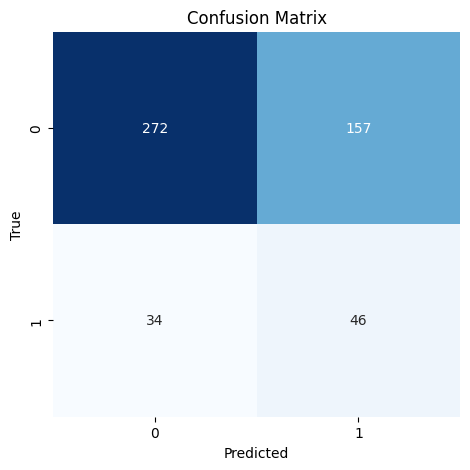

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear', penalty='l1')

# Example usage of train_predict_evaluate_model function with Logistic Regression
train_predict_evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       429
           1       0.23      0.57      0.33        80

    accuracy                           0.62       509
   macro avg       0.56      0.60      0.53       509
weighted avg       0.78      0.62      0.67       509

************************************************************
************************************************************
************************************************************


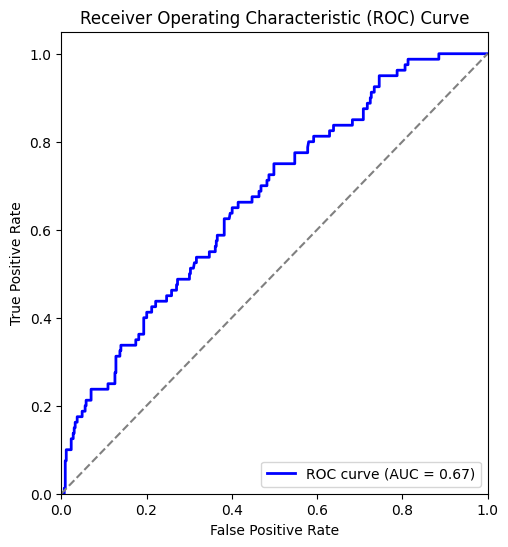

************************************************************
************************************************************
************************************************************


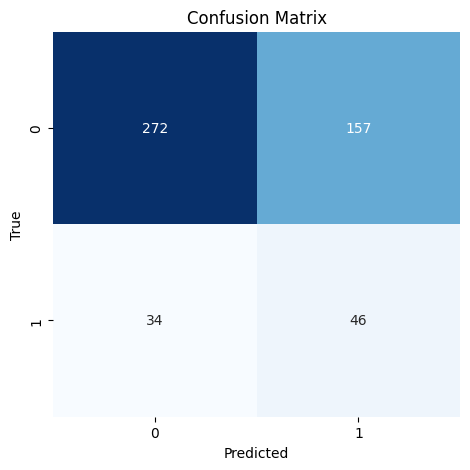

In [ ]:
# Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
train_predict_evaluate_model_cv(LogisticRegression(), param_grid_logistic, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       429
           1       0.24      0.29      0.26        80

    accuracy                           0.74       509
   macro avg       0.55      0.56      0.55       509
weighted avg       0.76      0.74      0.75       509

************************************************************
************************************************************
************************************************************


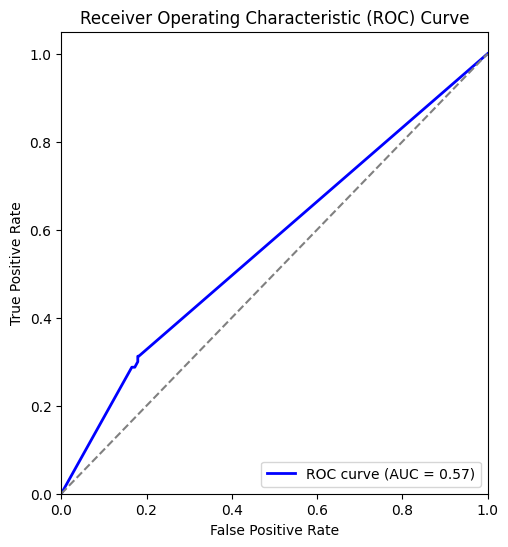

************************************************************
************************************************************
************************************************************


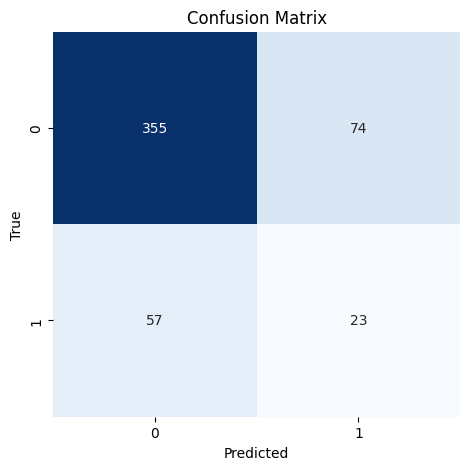

In [ ]:
# Define Decision Tree model
decision_tree = DecisionTreeClassifier(criterion='log_loss',splitter='random')
# Example usage of train_predict_evaluate_model function with Decision Tree and hyperparameter grid
train_predict_evaluate_model(decision_tree, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       429
           1       0.21      0.20      0.21        80

    accuracy                           0.76       509
   macro avg       0.53      0.53      0.53       509
weighted avg       0.75      0.76      0.76       509

************************************************************
************************************************************
************************************************************


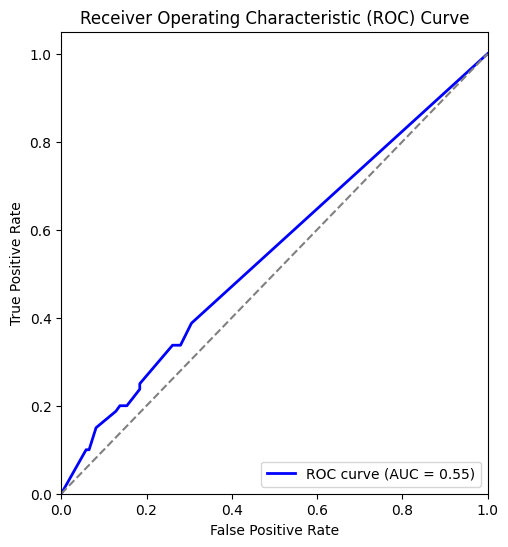

************************************************************
************************************************************
************************************************************


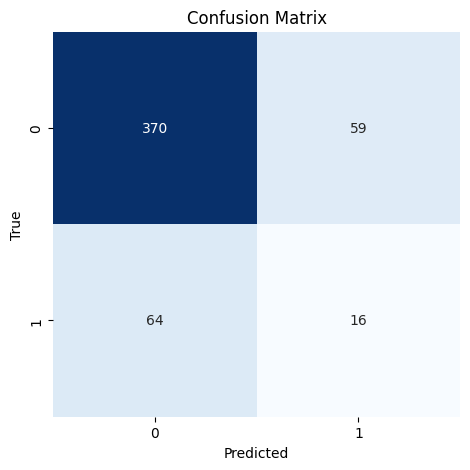

In [ ]:
# Decision Tree
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1, 2, 3]
}
train_predict_evaluate_model_cv(DecisionTreeClassifier(criterion='log_loss'), param_grid_decision_tree, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       429
           1       0.18      0.21      0.20        80

    accuracy                           0.72       509
   macro avg       0.51      0.52      0.51       509
weighted avg       0.74      0.72      0.73       509

************************************************************
************************************************************
************************************************************


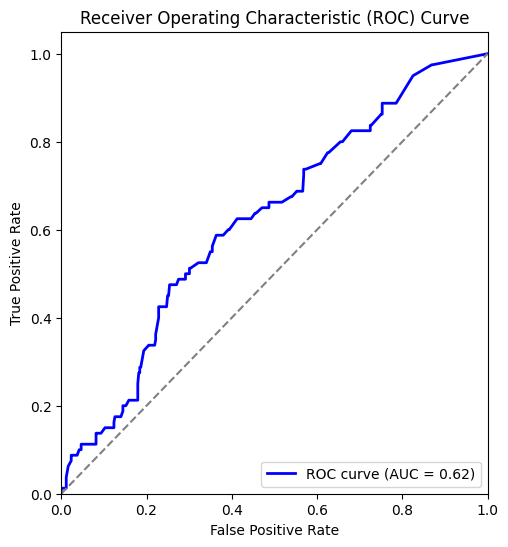

************************************************************
************************************************************
************************************************************


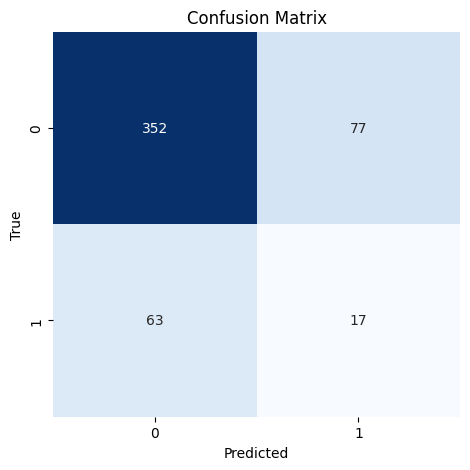

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
random_forest = RandomForestClassifier(criterion='entropy',max_features = 'log2')

# Example usage of train_predict_evaluate_model function with Random Forest and hyperparameter grid
train_predict_evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Best hyperparameters: {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 60}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       429
           1       0.21      0.26      0.23        80

    accuracy                           0.73       509
   macro avg       0.53      0.54      0.53       509
weighted avg       0.75      0.73      0.74       509

************************************************************
************************************************************
************************************************************


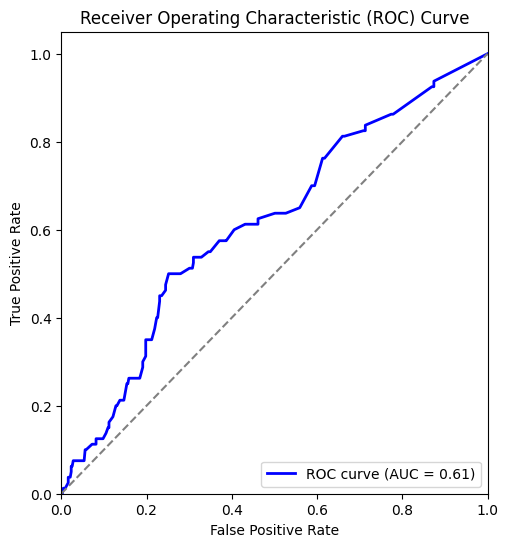

************************************************************
************************************************************
************************************************************


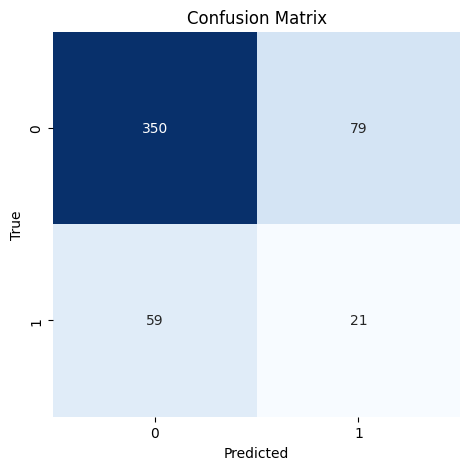

In [ ]:
# Random Forest
param_grid_random_forest = {
    'n_estimators': [60,75,90],
    'max_features': ['sqrt'],
    'max_depth': [50,75,100]
}
train_predict_evaluate_model_cv(RandomForestClassifier(criterion='entropy'), param_grid_random_forest, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       429
           1       0.21      0.40      0.28        80

    accuracy                           0.67       509
   macro avg       0.54      0.56      0.53       509
weighted avg       0.76      0.67      0.71       509

************************************************************
************************************************************
************************************************************


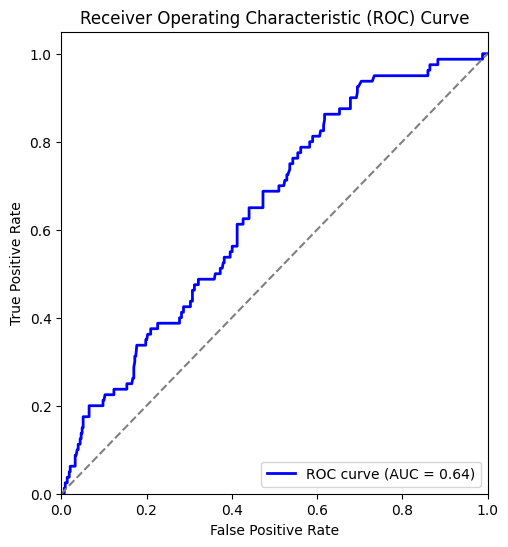

************************************************************
************************************************************
************************************************************


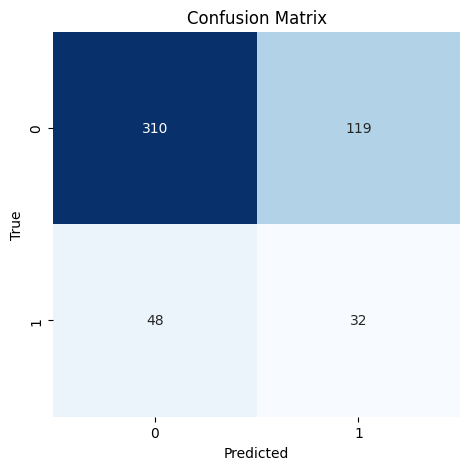

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(loss = 'exponential',criterion = 'squared_error')

# Example usage of train_predict_evaluate_model function with Gradient Boosting and hyperparameter grid
train_predict_evaluate_model(gradient_boosting, X_train_resampled, y_train_resampled, X_test_transformed, y_test)


Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       429
           1       0.19      0.14      0.16        80

    accuracy                           0.77       509
   macro avg       0.52      0.52      0.52       509
weighted avg       0.74      0.77      0.76       509

************************************************************
************************************************************
************************************************************


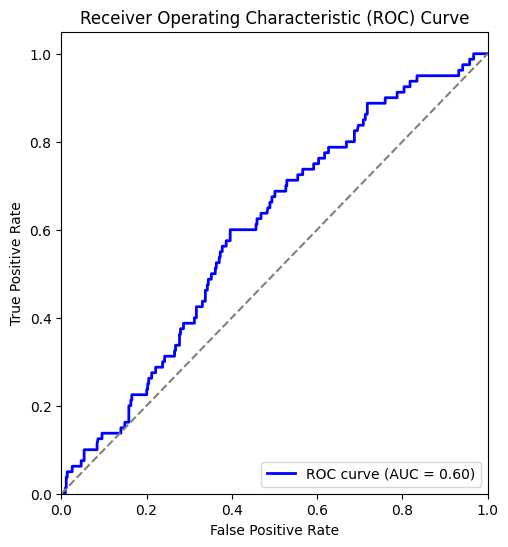

************************************************************
************************************************************
************************************************************


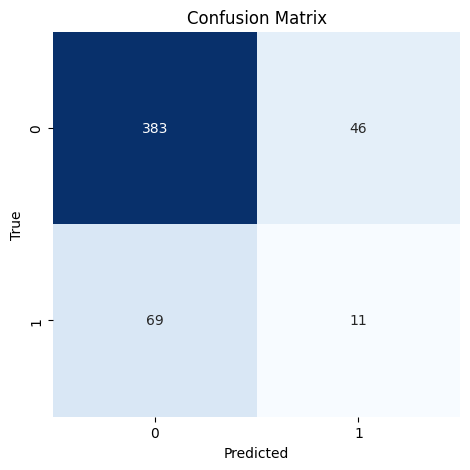

In [ ]:
# Gradient Boosting Classifier
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.5, 0.1],
    'max_depth': [3, 4, 5]}
train_predict_evaluate_model_cv(GradientBoostingClassifier(), param_grid_gradient_boosting, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       429
           1       0.24      0.57      0.34        80

    accuracy                           0.65       509
   macro avg       0.57      0.62      0.55       509
weighted avg       0.79      0.65      0.70       509

************************************************************
************************************************************
************************************************************


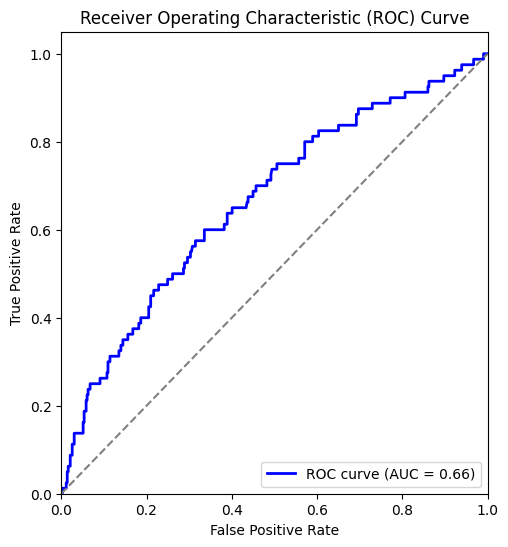

************************************************************
************************************************************
************************************************************


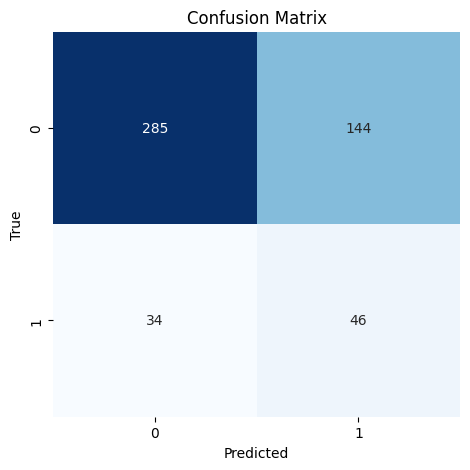

In [ ]:
from sklearn.svm import SVC

# Define Support Vector Machine (SVM) model with probability=True
svm = SVC(probability=True,kernel = 'poly',gamma = 'auto',decision_function_shape = 'ovo')

# Example usage of train_predict_evaluate_model function with SVM and hyperparameter grid
train_predict_evaluate_model(svm, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       429
           1       0.24      0.59      0.35        80

    accuracy                           0.65       509
   macro avg       0.57      0.62      0.55       509
weighted avg       0.79      0.65      0.70       509

************************************************************
************************************************************
************************************************************


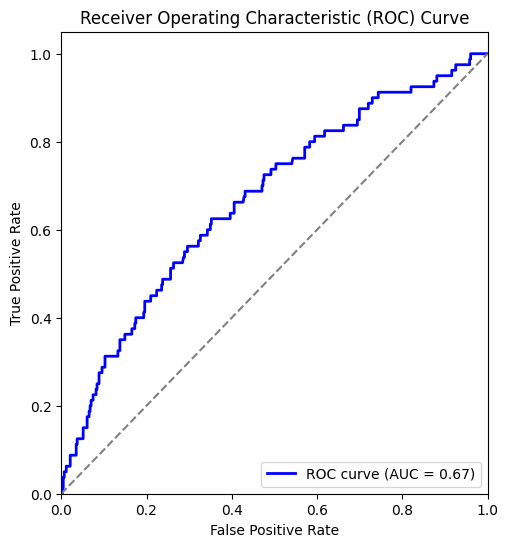

************************************************************
************************************************************
************************************************************


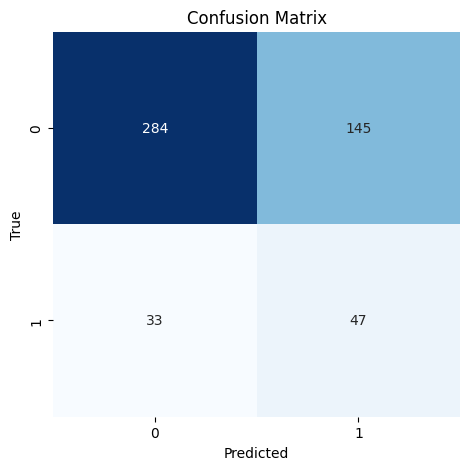

In [ ]:
# Support Vector Classifier
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['poly', 'sigmoid']
}
train_predict_evaluate_model_cv(SVC(probability=True), param_grid_svc, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***